# 7.8.3 GAM

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Wage.csv')
print(data.shape)
data.head()

(3000, 13)


,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [18]:
# the first col dones't seem to be that relevant
data = data.iloc[:,1:]

# encoding eduation column
data['education'].unique()
# we can see it has some numbers, so, lets use that for encoding

data['education'] = data['education'].map(lambda x: int(x[0]))
print(data['education'].dtype)
print(data['education'].unique())

int64
[1 4 3 2 5]


In [19]:
# "GAM is just a big linear regression model using an appropriate choice of basis functions" - taken from book
# so, for generative additive models, we create a matrix from patsy.dmatrix, which will be a combination of several functions, 
# like cubic splines, natural spline. etc, hence it has additive models in its name
# we are cuurently working on this line in the book - > gam1=lm(wage∼ns(year ,4)+ns(age ,5)+education ,data=Wage)

In [21]:
X_transformed = dmatrix('cr(year,df = 4) + cr(age,df=5) + education', data = {'year':data['year'],'age':data['age'],
                                                                              'education':data['education']} ,
                                                                            return_type = 'dataframe')
# fit the model
model_gam = sm.OLS(data['wage'],X_transformed).fit()
preds = model_gam.predict(X_transformed)

fig (7.12) in text

Text(0, 0.5, 'f1(year)')

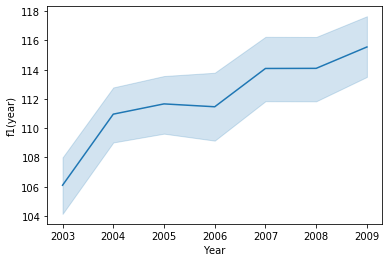

In [24]:
sns.lineplot(data['year'],preds)
plt.xlabel('Year')
plt.ylabel('f1(year)')

Text(0, 0.5, 'f1(year)')

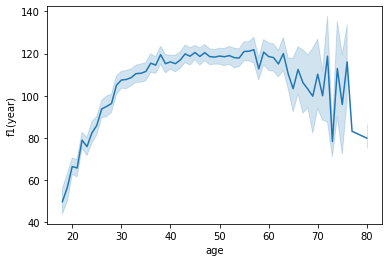

In [26]:
sns.lineplot(data['age'],preds)
plt.xlabel('age')
plt.ylabel('f1(year)')
# as it can be seen the figure is not similar as in the text, that;s because here it is not a smooth spline as it was in the 
# book.

Text(0, 0.5, 'Wage')

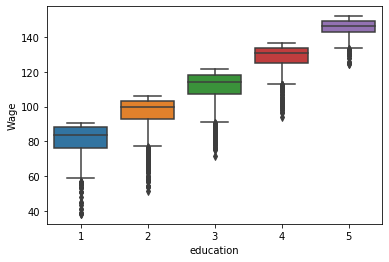

In [28]:
sns.boxplot(data['education'],preds)
plt.ylabel('Wage')

## Using ANNOVA 
### We will use annova test to decide which of the following three functions is best to use.  
- model 1 - GAM that excludes year 
- model 2 - GAM that uses a linear function of linear 
- model 3 - GAM that uses a spline of year

In [30]:
#model1
X_transformed1 = dmatrix('cr(age,df=5) + education', data = {'age':data['age'],
                                                                              'education':data['education']} ,
                                                                            return_type = 'dataframe')
fit1 = sm.OLS(data['wage'],X_transformed1).fit(disp = 0)

#model2
X_transformed2 = dmatrix('year + cr(age,df=5) + education', data = {'year':data['year'],'age':data['age'],
                                                                              'education':data['education']} ,
                                                                            return_type = 'dataframe')
fit2 = sm.OLS(data['wage'],X_transformed2).fit(disp = 0)

#model3
X_transformed3 = dmatrix('cr(year,df = 4) + cr(age,df=5) + education', data = {'year':data['year'],'age':data['age'],
                                                                              'education':data['education']} ,
                                                                            return_type = 'dataframe')
fit3 = sm.OLS(data['wage'],X_transformed3).fit(disp = 0)


table = sm.stats.anova_lm(fit1,fit2,fit3)
print(table)

   df_resid           ssr  df_diff       ss_diff          F    Pr(>F)
0    2994.0  3.750437e+06      0.0           NaN        NaN       NaN
1    2993.0  3.732809e+06      1.0  17627.473318  14.129318  0.000174
2    2991.0  3.731516e+06      2.0   1293.696286   0.518482  0.595477


In [31]:
# the first p value is small enough to conclude that model1 is not enough to explain the data, and model2 is better.
# the second p value is not significant enough to say that model 3 is better than model2, 
# hence we conclude that model 2 is the best choice among the three

# Happy Learning :) , keep hustling